<a href="https://colab.research.google.com/github/fisherj1/OMM/blob/main/%D0%A2%D0%92%D0%9C%D0%90%D0%98%D0%98%D0%94%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center"><b><h1><b>Зачетная работа по дисциплине</b></h1></b></div>
    <div align="center"><b><h2><b>"Теоретико-возможностные методы анализа и интерпретации данных измерений"</b></h2></b></div>
<div align="center"><h3>студента 435 группы Чернова Кирилла</h3></div><br>

Рассмотрим задачу принятия решения на примере планирования моего утра после ночного сна. Множество состояний после сна: $$\begin{aligned}\Theta = \{\theta_1, \theta_2\}\end{aligned}, $$ где $\theta_1$ — состояние, при котором я спал больше семи часов,  $\theta_2$ —  меньше семи часов (но больше пяти часов).
Определим мои возможные действия с утра после ночного сна:

1) Продолжить спать ($d_1$); \\
2) Встать, но заниматься своими делами (домашние задания, проекты, диплом) ($d_2$); \\
3) Пойти на учебу ($d_3$); \\
4) Пойти тренироваться (я занимаюсь легой ателтикой) ($d_4$); \\
5) Встать, но никуда не идти (заняться бездельем) ($d_5$); \\

Обозначим множество действий следующим образом: $D = \{d_1, \dots, d_5\}$

Пусть задана матрица, оценивающая возможные потери $l(\theta_i, d_j)$ при принятии того или иного решения при конкретном состоянии.

|   | $d_1$ | $d_2$ | $d_3$ | $d_4$ | $d_5$  |
|---|----|----|----|----|-----|
| $\theta_1$ |50|20|0|0|100|
| $\theta_2$ |0|10|20|50|30|


##1) Минимаксное и минимаксное рандомизиронванное решение.

Считаем, что неизвестно какое именно состояние наступило в момент принятия решения (я не знаю, сколько времени я спал), но поскольку нам известно множество $\Theta$ возможных состояний, то оптимальное правило можно определить как решение задачи
\begin{aligned}
c^* = \min_{d \in D} \max_{\theta \in \Theta} \; l(\theta, d).
\end{aligned}

Также, можно воспользоваться экспериментом с $m$ случайными исходами $\alpha_1, \dots, \alpha_m$: $\sum_\limits{k=1}^m P(\alpha_k) = 1$. 

В этом случае, прежде чем принять решение о действии в состоянии $\theta$, можно разыграть случайный эксперимент и принять решение о действии $d_{i_k}$, если исходном эксперимента окажется $\alpha_k$. Такое правило называется рандомизированным.
\begin{aligned}
c_r^* = \min_{p \in \cal P} \max_{\theta \in  \Theta} l(\theta, p),
\end{aligned}
где $\cal P$ — множество распределений для $\alpha_k$.

$c_r^*$ — оптимальный рандомизированный риск, $c^*$ — оптимальный минимаксный риск. Можно доказать, что $c_r^* \leq c^*$.

Решать задачу будем графическим способом. Необходимо построить все точки $\Big(l(\theta_1, d_i), l(\theta_1, d_i)\Big)$ на графике и затем выбрать точку, максимальная координата которой будет минимальна.

Text(21.0, 1, 'c* = 20')

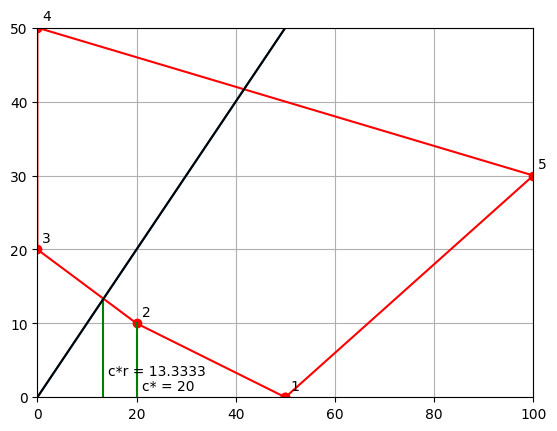

In [2]:
import numpy as np
import matplotlib.pyplot as plt
L = np.array([[50, 20, 0, 0, 100, 50],
              [0, 10, 20, 50, 30, 0]])
plt.xlim([0, 100])
plt.ylim([0, 50])
plt.plot(L[0], L[1], 'ro-')
plt.grid(True)
plt.plot([0, 50], [0, 50])
plt.plot([13.3333, 13.3333], [13.3333, 0], color='green')
plt.plot([20, 20], [10, 0], color = 'green')
plt.axline((0, 0), slope=1, color="black")
points = [1, 2, 3, 4, 5]
for i in range(5):
  plt.text(L[0, i]+1, L[1, i]+1,  f"{points[i]}")
plt.text(13.3333+1, 3, f"c*r = {13.3333}")
plt.text(20.+1, 1, f"c* = {20}")


##2) Маргинальное решение:
Допустим, появляются наблюдения за состоянием после сна: $x = \{x_1, x_2, x_3\}$ ($x_1$ — отличное самочувствие, $x_2$ — удовлетворительное самочувствие, $x_3$ — ужасное самочувствие). Они содержат информацию о состояниях после сна $θ_j, \; j = 1, 2.$ Эта информация выражается в виде заданных условных вероятностей $P(x|θ), \; x ∈ X, \; θ ∈ \Theta$.

Нам необходимо найти такую стратегию $s(·): X → D$ — правило решения. Таких отображений может быть всего $5^3$ штук. Каждому правилу $s$ ставим в соответствие разбиение множества $X = D_1 +...+ D_5, \; D_j = \{x ∈ X: s(x) = d_j\}, \; j = 1, ..., 5$. Запишем выражение
для ожидаемого маргинального риска.

\begin{aligned}
L_i(s) = \sum_{t=1}^5 l(θ_i, d_t) · p_s(d_t | \theta_i) 
\end{aligned}.
В нашем условии задачи не даны вероятности $p_s(d_t|\theta_i)$, однако их можно вычислить:

\begin{aligned}
p_s(d|\theta) = \sum_{x: \;s(x)=d} p(x| \theta).
\end{aligned}



Добавим информацию о вероятности каждого из наблюдений при различных состояниях:

|   | $x_1$ | $x_2$ | $x_3$ |
|---|----|----|----|
| $\theta_1$ |0.7|0.2|0.1|
| $\theta_2$ |0.05|0.3|0.65|




Создадаим массив всевозможных разбиений (рамзер 125x5):

In [3]:
s_s = []
for k in range(5):
  for j in range(5):
    for l in range(5):
      temp = [[], [], [], [], []]
      temp[k].append(0)
      temp[j].append(1)
      temp[l].append(2)
      s_s.append(temp)

Найдем всевозможные вероятности $p_s(d_t|\theta_i)$.

In [4]:
X = np.array([[0.7, 0.2, 0.1], 
              [0.05, 0.3, 0.65]])

def pr(s, i, t):
  sum = 0
  for l in s_s[s][t]:
    sum += X[i, l]
  return sum

p = np.zeros((125, 2, 5))

for s in range(125):
  for i in range(2):
    for t in range(5):
      p[s, i, t] = pr(s, i, t)

Найдем маргинальные риски $L_i(s)$.

In [5]:
def get_mar(i,s):
  sum = 0
  for t in range(5):
    sum += L[i, t]*p[s, i, t]
  return sum
L_mar = np.zeros((2, 125))
for i in range(2):
  for s in range(125):
    L_mar[i, s] = get_mar(i, s)


Отрисовка маргинальных рисков.

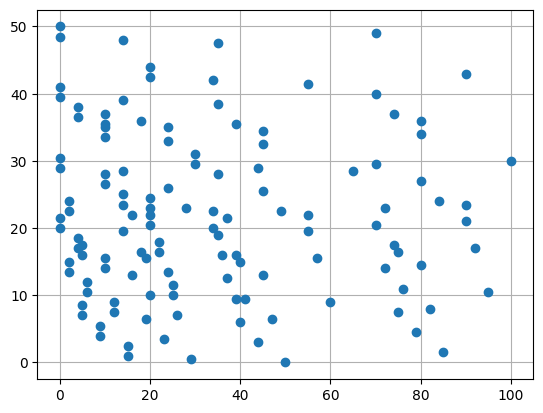

In [6]:
plt.plot(L_mar[0], L_mar[1], "o")
plt.grid()

Нахождение оптимального минимаксного маргниального риска (под индексом 60).

In [7]:
temp = []
for s in range(125):
  temp.append(np.amax(L_mar[:, s]))
print(np.min(temp), np.argmin(temp))

7.0 60


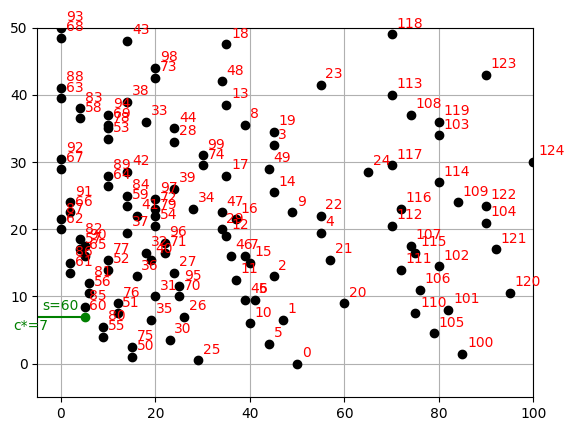

In [8]:
plt.xlim([-5, 100])
plt.ylim([-5, 50])
plt.grid()
plt.plot(L_mar[0, 0:60], L_mar[1, 0:60], "o", color = "black")
plt.plot(L_mar[0, 61:], L_mar[1, 61:], "o", color="black")
plt.plot(L_mar[0, 60], L_mar[1, 60], "o", color = "green")
plt.text(L_mar[0, 60]-9, L_mar[1, 60]+1, f"s={60}", color="green")
plt.plot([-5, L_mar[0, 60]], [L_mar[1, 60], L_mar[1, 60]], color="green")
plt.text(-10,L_mar[1, 60]-2, f"c*={7}", color="green" )
for i in range(125):
  plt.text(L_mar[0, i]+1, L_mar[1, i]+1,  f"{i}", color="red")

In [9]:
s_s[60]

[[2], [], [0, 1], [], []]

То есть если я чувствую себя хорошо и удовлетворительно после сна, то нужно идти на учебу :). А если плохо себя чувствую — то лучше поспать дольше.

Рассмотрим рандомизированный маргинальный риск.

Text(10.0, 5.0, '55')

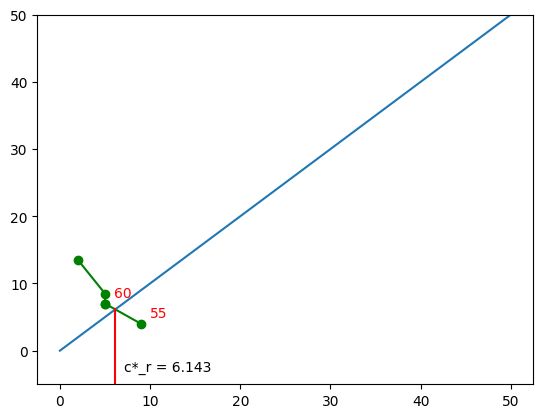

In [10]:
plt.ylim([-5,50])
plt.plot([L_mar[0, 55], L_mar[0, 60], L_mar[0, 85], L_mar[0, 61]], [L_mar[1, 55], L_mar[1, 60], L_mar[1, 85], L_mar[1, 61]], "-o", color = "green")
plt.plot(L_mar[0, 60], L_mar[1, 60], "o", color = "green")
plt.plot([0,50], [0, 50])
plt.plot([6.143, 6.143], [6.143, -5], color="red")
plt.text(6.143+1, -3, f"c*_r = {6.143}")
plt.text(L_mar[0, 60]+1, L_mar[1, 60]+1,  f"{60}", color="red")
plt.text(L_mar[0, 55]+1, L_mar[1, 55]+1,  f"{55}", color="red")

In [11]:
s_s[55]

[[2], [1], [0], [], []]

Уравнения для нахождения распределения вероятностей выбора $s_{60}$ и $s_{55}$:
\begin{align}
p^*_{60} + p^*_{55} = 1
\end{align}
\begin{align}
L_1(60)\cdot p^*_{60} + L_1(55)\cdot p^*_{55} = L_2(60)\cdot p^*_{60} + L_2(55)\cdot p^*_{55}
\end{align}

Получим: $p^*_{55} = 0.2857; \;p^*_{60} = 0,7143$.

Получили маргниальное минмиаксное и маргинальное рандомизированое оптимальные риски:
$c^* = 7, \\
с^*_r = 6.143$

Причем снова: $$ c^* \leq c^*_r$$.

P.S: $s_{55}$ говорит о том, что при хорошем самочувствии нужно выбирать учебу, при удовлетворительном — заняться своими делами, а если плохо себя чувствую — то лучше отоспаться.

##3) Баесовское правило решения

В этом случае, в постановке задачи добавляется априорная информация $r_i ∈ R $ — вероятности состояний $θ_i$: $r_i = p(θ_i), \sum_iP(r_i) = 1, r_i ≥ 0$.
Зададим априорные вероятности о моих состояних: $r_1 = P(\theta_1) = 0.8, r_2 = P(\theta_2) = 0.2.$ 
Байесовский риск теперь превращается в математическое ожидание маргинального
риска по априорному распределению:
\begin{align}
L(s) = \sum_{i=1}^{5^3} L_i(s) \cdot p(\theta_i).
\end{align}
Остается только из списка значений выбрать наименьшее. Это и будет байесовское правило принятия решений.

In [13]:
L_bs = []
for i in range(125):
  L_bs.append(L_mar[0, i]*0.8 + L_mar[1, i]*0.2)


print(np.argmin(L_bs), L_bs[np.argmin(L_bs)])
print(s_s[62])

62 4.0
[[], [], [0, 1, 2], [], []]


То есть по Байесу $s^* = 62, \;c^*_{Bayes} = 4.0$, (в любом случае нужно учиться) причем, как и полагается: $c^*_{Bayes} \leq c^*_r$. \\
Так же убедимся в этом графически.


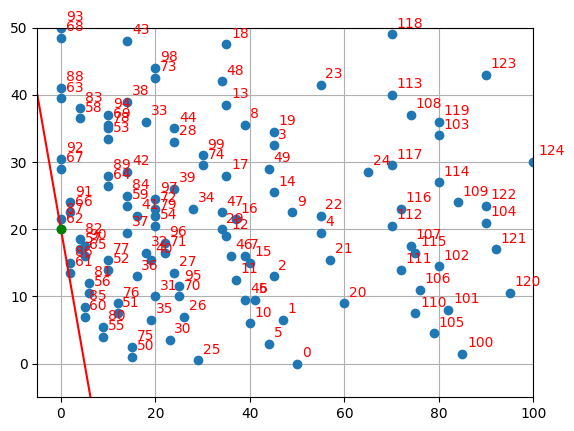

In [14]:
plt.ylim([-5, 50])
plt.xlim([-5, 100])
plt.grid()
plt.plot(L_mar[0], L_mar[1], "o")
plt.plot([-5, 6.25], [40, -5], color="red")
plt.plot(L_mar[0, 62], L_mar[1, 62], "o", color='green')
for i in range(125):
  plt.text(L_mar[0, i]+1, L_mar[1, i]+1,  f"{i}", color="red")

Для опредление наименее благоприятного априорного распредления найдем уравнение прямой, проходящей через точки 62 и 61. Это прямая: $13/17*L_1 + 4/17*L_2 = 80/17 = 4,705 = с^*_{Bayess bad} <= c^*_r.$ То есть наименее благоприятное распредление: $p(\theta_1) = 13/17, p(\theta_2) = 4/17$.

In [16]:
L_mar[:,62], L_mar[:,61]

(array([ 0., 20.]), array([ 2. , 13.5]))

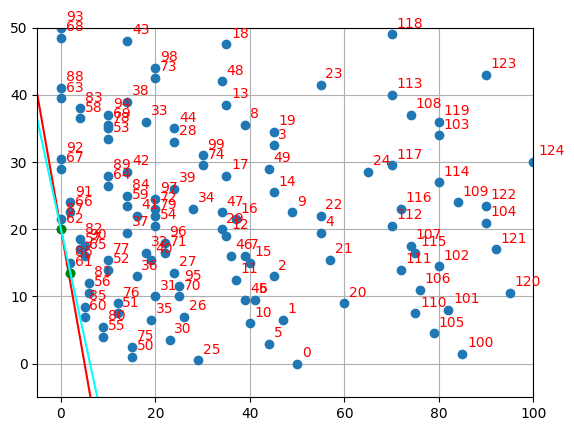

In [18]:
plt.ylim([-5, 50])
plt.xlim([-5, 100])
plt.grid()
plt.plot(L_mar[0], L_mar[1], "o")
plt.plot([-5, 6.25], [40, -5], color="red")
plt.plot(L_mar[0, 62], L_mar[1, 62], "o", color='green')
plt.plot(L_mar[0, 61], L_mar[1, 61], "o", color='green')
plt.plot([-5, (80+5*4)/13], [(80+5*13)/4, -5], "-", color='aqua')
for i in range(125):
  plt.text(L_mar[0, i]+1, L_mar[1, i]+1,  f"{i}", color="red")

##3) Баесово действие
В данном случае мы рассматриваем байесовскую постановку, но теперь у нас нет наблюдений. В таком случае, необходимо искать байесово действие.
В таком случае маргинальный риск считаем следующим образом:
\begin{align}
L(d_j) = \sum_{i=1}^2 l(\theta_i, d_j) p(\theta_i)
\end{align}
Для решения необходимо:
\begin{align}
L(d_j) \sim \min_{1 \leq j \leq N}
\end{align}
При любом распределении $p(θ_1), \;p(\theta_2)$.
Решим эту задачу графически.



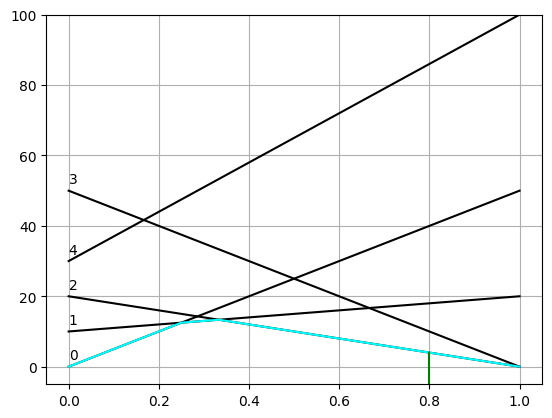

In [ ]:
plt.ylim([-5, 100])
lines = []
for i in range(5):
  lines.append([0, L[1, i], 1, L[0, i]])
plt.grid()
for i, l in enumerate(lines):
  plt.plot([l[0], l[2]], [l[1], l[3]], color="black")
  plt.text(l[0], l[1]+2, f"{i}")
plt.plot([0, 1/4, 1/3, 1], [0 ,50/4, 10/3+10, 0], color="aqua")
plt.plot([0.8, 0.8], [4, -5], color="green")

То есть баесово действие - учеба!